# Fraud Detection

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder


## Data Analysis and Preprocessing

### Data Loading

In [2]:
from scripts.fraud_detection import load_data
credit_card_data, fraud_data, ip_address_country = load_data('docs')


### Verify The Loaded Dataset

### Credit Card Data

In [3]:
credit_card_data.tail(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Fraud Data

In [5]:
fraud_data.head(10)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [6]:
fraud_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### Ip Address to Country

In [7]:
ip_address_country.head(10)


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [8]:
ip_address_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Handle Missing Values

In [9]:
from scripts.fraud_detection import find_missing_values


### Fing Missing Values Of Credit Card Data

In [10]:
find_missing_values(credit_card_data)


From 31 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Fing Missing Values Of Fraud Data


In [11]:
find_missing_values(fraud_data)


From 11 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Fing Missing Values Of Ip Address to Country Data


In [12]:
find_missing_values(ip_address_country)


From 3 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Data Cleaning

In [13]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
ip_address_country['lower_bound_ip_address'] = ip_address_country['lower_bound_ip_address'].astype(int)


### Exploratory Data Analysis (EDA)

### Univariate analysis

#### Univariate analysis for credit card data

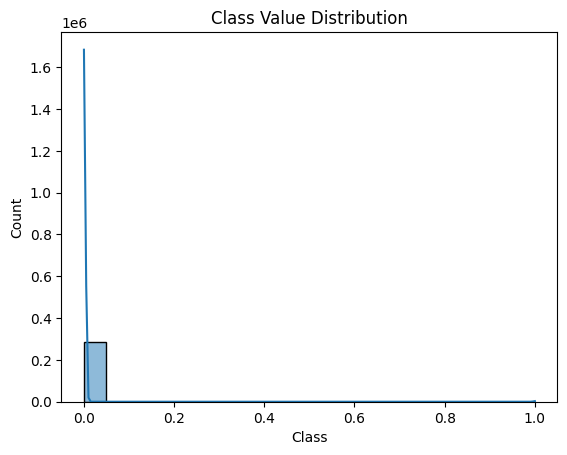

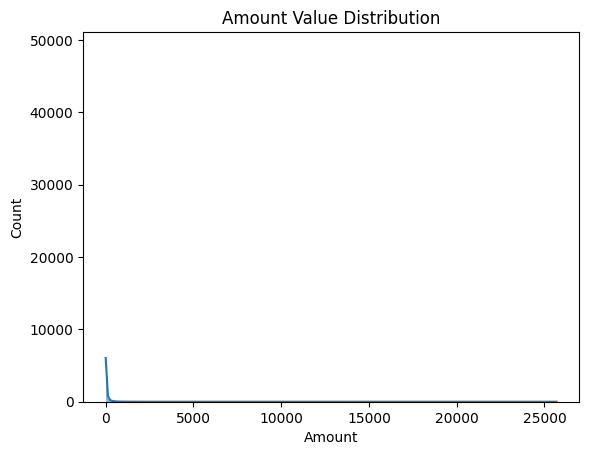

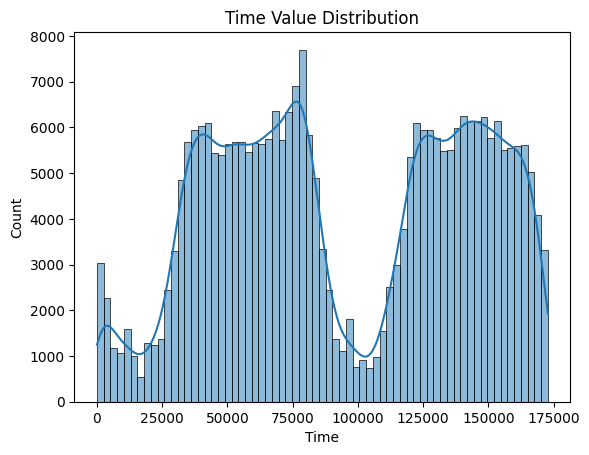

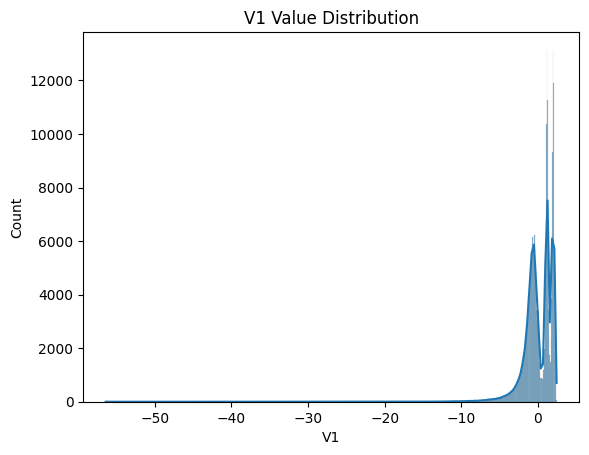

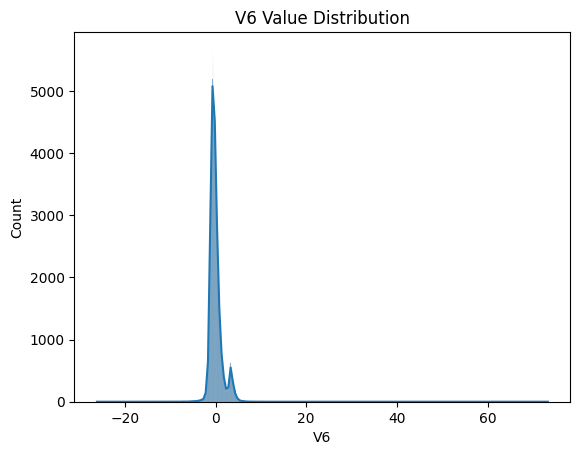

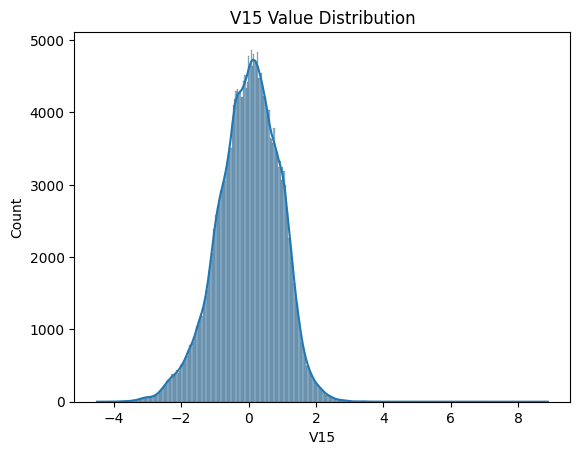

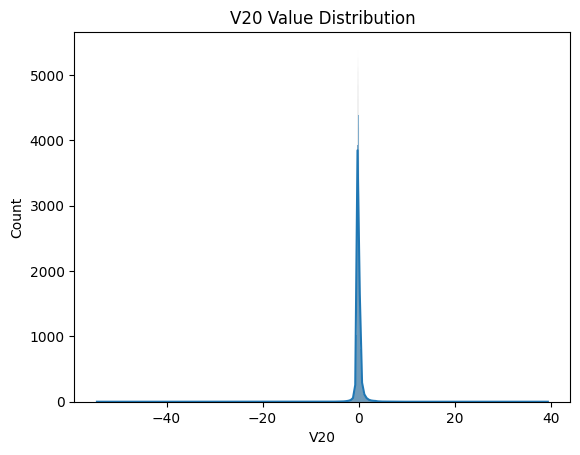

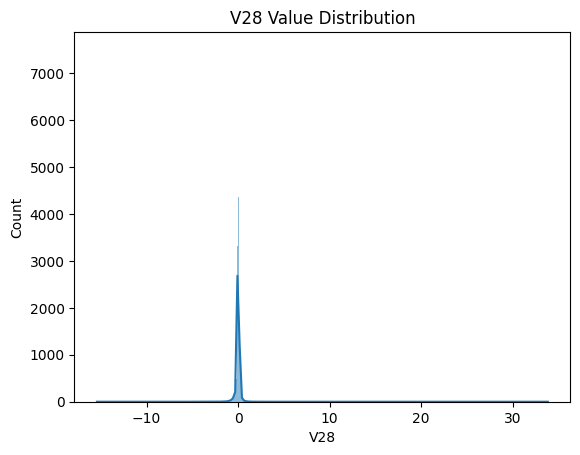

In [14]:
credit_card_data_columns = ['Class','Amount','Time','V1','V6','V15','V20','V28']
from scripts.fraud_detection import univariate_analysis
univariate_analysis(credit_card_data,credit_card_data_columns)


#### Univariate analysis for fraud data

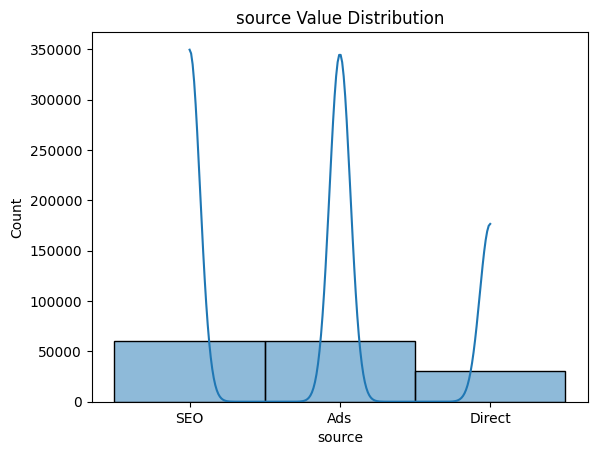

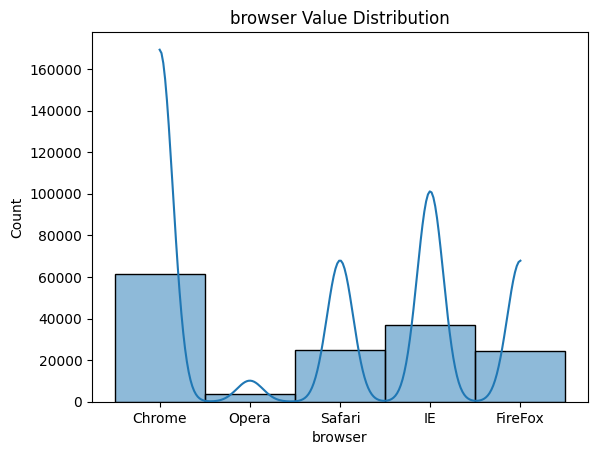

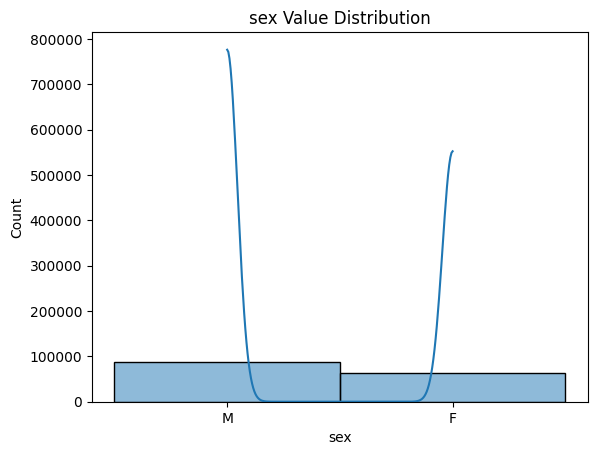

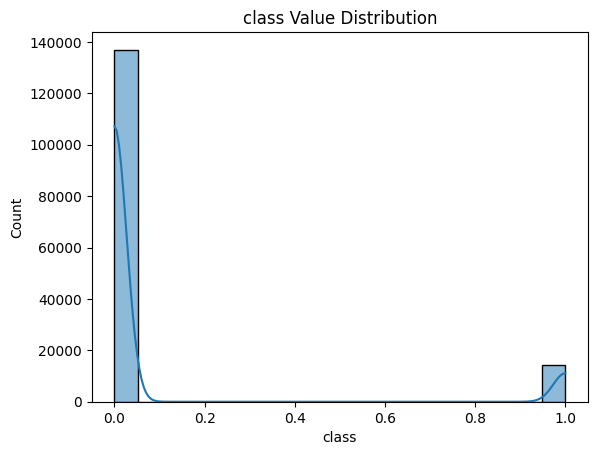

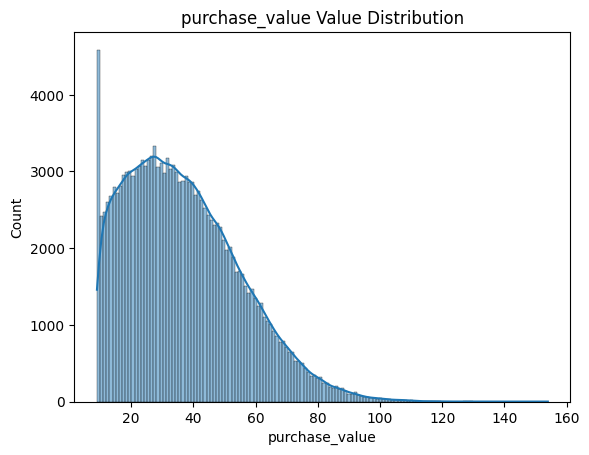

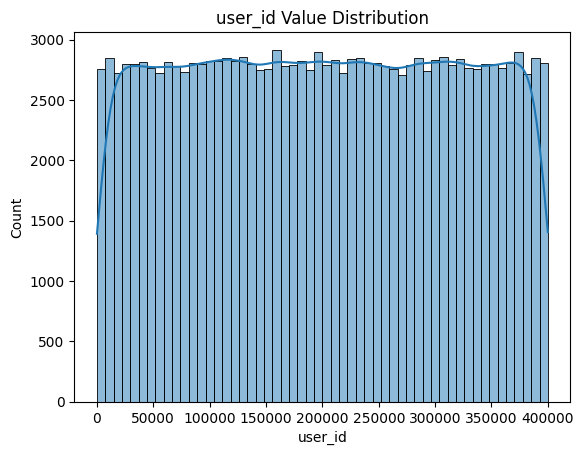

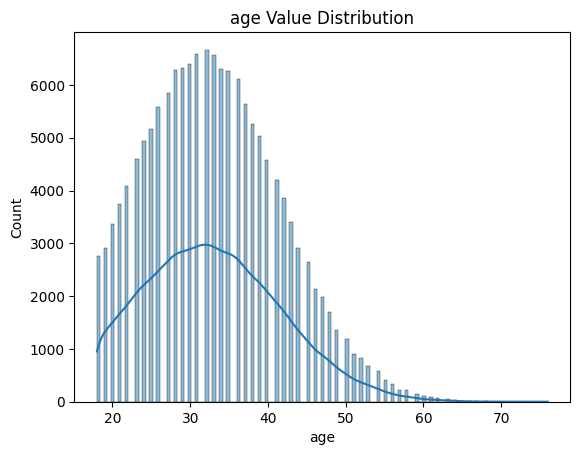

In [15]:
columns_fraud_data=['source','browser','sex','class','purchase_value','user_id','age']
univariate_analysis(fraud_data,columns_fraud_data)


### Univariate analysis of ip address to country data

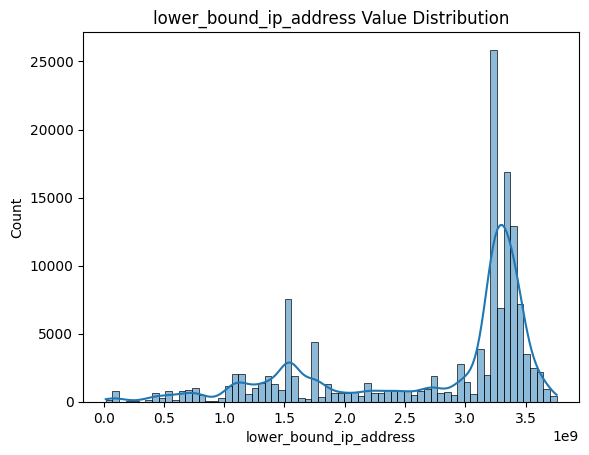

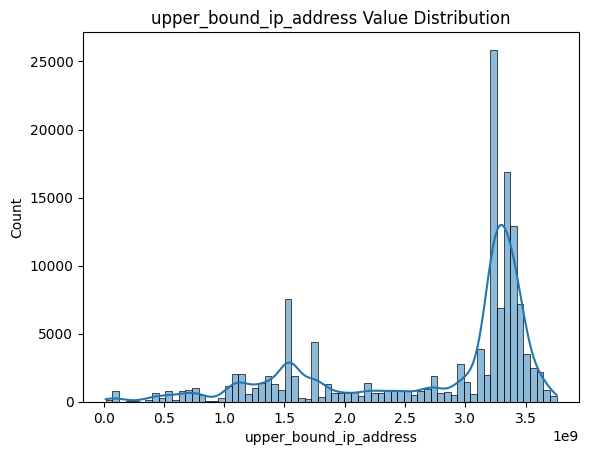

In [16]:
ip_address_country_columns = ['lower_bound_ip_address','upper_bound_ip_address']
univariate_analysis(ip_address_country,ip_address_country_columns)


### Bivariate Analysis

#### Bivariate analysis of fraud data

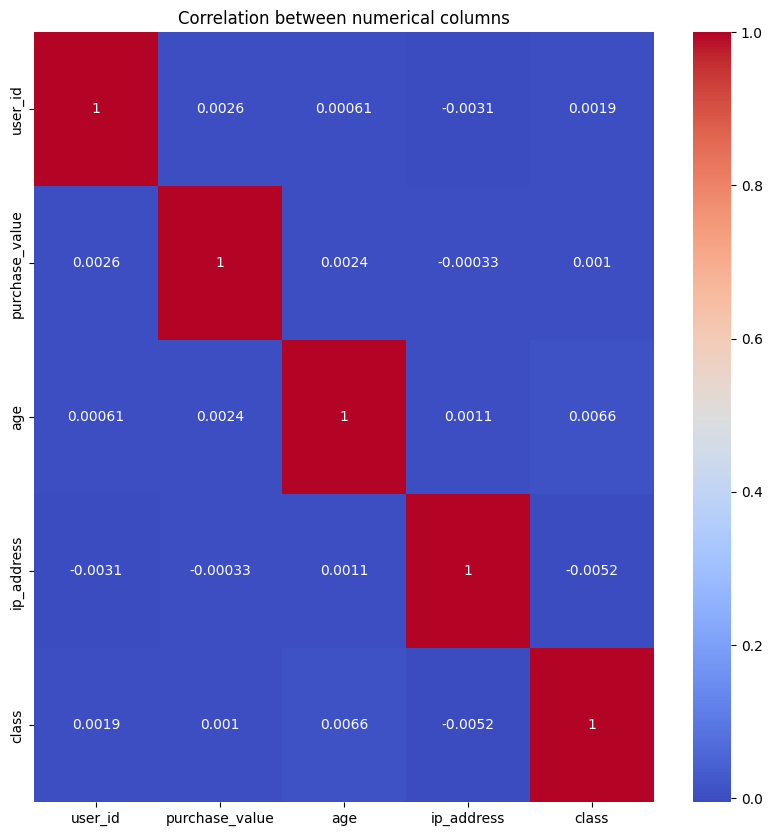

In [17]:
numerical_fraud_data= fraud_data.select_dtypes(include='number')
from scripts.fraud_detection import bivariate_analysis
bivariate_analysis(numerical_fraud_data)


#### Bivariate analysis of credit card data

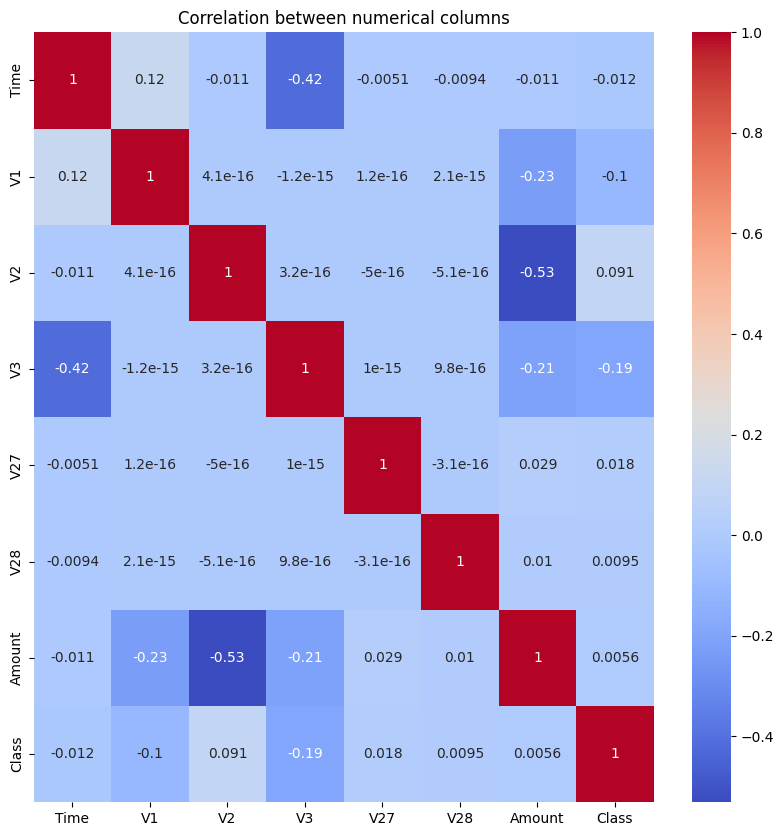

In [18]:
credit_card_data_corr = credit_card_data.drop(['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26'], inplace=False, axis=1)
bivariate_analysis(credit_card_data_corr)


### Merge Datasets for Geolocation Analysis

In [19]:
from scripts.fraud_detection import merge_fraud_ip_address_data
merged_fraud_data = merge_fraud_ip_address_data(fraud_data,ip_address_country)


In [20]:
merged_fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


In [21]:
merged_fraud_data.to_csv('docs/merged_fraud_data.csv',index=False)


In [22]:
merged_fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


### Feature Engineering


### Calculate Transaction Frequency and Velocity

In [23]:
merged_fraud_data['purchase_time'] = pd.to_datetime(merged_fraud_data['purchase_time'])


In [24]:
transaction_frequency = merged_fraud_data.groupby('device_id').size().reset_index(name='transaction_frequency')
merged_fraud_data = merged_fraud_data.merge(transaction_frequency, on='device_id')


In [25]:
merged_fraud_data = merged_fraud_data.sort_values(by=['user_id', 'purchase_time'])
merged_fraud_data['transaction_velocity'] = merged_fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)


### Time-based features

In [26]:
merged_fraud_data['hour_of_day'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.hour
merged_fraud_data['day_of_week'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.dayofweek


In [27]:
merged_fraud_data.tail()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
53346,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,1.549271e+09,1.549795e+09,France,1,0.0,7,2
94166,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,2.755330e+09,2.755396e+09,Germany,1,0.0,7,3
127114,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,3.701441e+09,3.701473e+09,Japan,1,0.0,23,4
118057,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,3.454697e+09,3.454730e+09,United States,1,0.0,20,2
41156,400000,2015-03-16 23:03:56,2015-04-20 06:27:52,58,ACINFPOJYYUAW,Ads,Chrome,M,25,1217910956,1,1.217397e+09,1.218445e+09,United States,1,0.0,6,0


In [28]:
merged_fraud_data['signup_time'] = pd.to_datetime(merged_fraud_data['signup_time'])
merged_fraud_data['sex'] = merged_fraud_data['sex'].replace({'F': 0, 'M': 1})


### Encode Categorical Features

In [29]:
merged_fraud_data['device_id'].value_counts()


device_id
NGQCKIADMZORL    20
CQTUVBYIWWWBC    20
KIPFSCNUGOLDP    20
ZUSVMDEZRBDTX    20
EQYVNEGOFLAWK    20
                 ..
PRVVQJWHVTURQ     1
OTRRFUOSBOQQZ     1
EWGJVRRCAIVFI     1
GDDGMJSSYPNCU     1
MTCUEQTBCCKZJ     1
Name: count, Length: 118434, dtype: int64

In [30]:
from scripts.fraud_detection import encodingCategoricalVariables


In [31]:
encoded_dataframe = encodingCategoricalVariables(merged_fraud_data)
encoded_dataframe.head()


,user_id,signup_time,purchase_time,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
30049,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,0,25,880217484,0,8.724152e+08,8.891924e+08,1,0.0,10,5,23685,2,0,171
95244,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,0,38,2785906106,0,2.785542e+09,2.786066e+09,1,0.0,21,5,56090,1,4,157
11606,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,1,25,356056736,0,3.523215e+08,3.690988e+08,1,0.0,11,3,82397,2,0,171
101959,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,1,19,2985180352,0,2.985034e+09,2.985296e+09,1,0.0,20,2,57518,0,4,107
19600,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,1,32,578312545,0,5.704253e+08,5.872026e+08,1,0.0,12,3,25758,1,2,171


In [32]:
encoded_dataframe.drop(columns=['signup_time','purchase_time'],inplace=True)


In [33]:
encoded_dataframe.head()


,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
30049,2,54,0,25,880217484,0,8.724152e+08,8.891924e+08,1,0.0,10,5,23685,2,0,171
95244,4,41,0,38,2785906106,0,2.785542e+09,2.786066e+09,1,0.0,21,5,56090,1,4,157
11606,8,47,1,25,356056736,0,3.523215e+08,3.690988e+08,1,0.0,11,3,82397,2,0,171
101959,12,35,1,19,2985180352,0,2.985034e+09,2.985296e+09,1,0.0,20,2,57518,0,4,107
19600,16,9,1,32,578312545,0,5.704253e+08,5.872026e+08,1,0.0,12,3,25758,1,2,171


### Normalization and Scaling

### Normalizing Fraud Data

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_fraud_data = scaler.fit_transform(encoded_dataframe)
normalized_fraud_dataframe = pd.DataFrame(normalized_fraud_data, columns=encoded_dataframe.columns)



In [35]:
normalized_fraud_dataframe.head()


,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
0,0.000000,0.310345,0.0,0.120690,0.230787,0.0,0.228703,0.233185,0.0,0.0,0.434783,0.833333,0.199986,1.0,0.0,0.950000
1,0.000005,0.220690,0.0,0.344828,0.740156,0.0,0.740063,0.740197,0.0,0.0,0.913043,0.833333,0.473601,0.5,1.0,0.872222
2,0.000015,0.262069,1.0,0.120690,0.090685,0.0,0.089687,0.094171,0.0,0.0,0.478261,0.500000,0.695727,1.0,0.0,0.950000
3,0.000025,0.179310,1.0,0.017241,0.793420,0.0,0.793385,0.793449,0.0,0.0,0.869565,0.333333,0.485659,0.0,1.0,0.594444
4,0.000035,0.000000,1.0,0.241379,0.150092,0.0,0.147984,0.152467,0.0,0.0,0.521739,0.500000,0.217490,0.5,0.5,0.950000


### Normalizing Credit Card Data

In [36]:
normalized_credit_card_data=scaler.fit_transform(credit_card_data)
normalized_credit_card_dataframe= pd.DataFrame(normalized_credit_card_data, columns=credit_card_data.columns)


In [37]:
normalized_credit_card_dataframe.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
5,0.000012,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,0.268257,0.788178,0.443190,...,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000143,0.0
6,0.000023,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,...,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.000194,0.0
7,0.000041,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,...,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0.0
8,0.000041,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,0.267610,0.794515,0.449275,...,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.003628,0.0
9,0.000052,0.952547,0.779072,0.855511,0.242081,0.769078,0.260539,0.269325,0.786131,0.437401,...,0.557499,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0.000143,0.0


## Model Building and Training 


### For Fraud Detection

In [38]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
X = normalized_fraud_dataframe.drop(columns=['class'])
y = normalized_fraud_dataframe['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.metrics import classification_report, accuracy_score # type: ignore

# Initialize models
log_reg_fraud = LogisticRegression()
rf_clf_fraud = RandomForestClassifier()

# Train models
log_reg_fraud.fit(X_train_scaled, y_train)
rf_clf_fraud.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = log_reg_fraud.predict(X_test_scaled)
y_pred_rf = rf_clf_fraud.predict(X_test_scaled)


Logistic Regression Report
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     23389
         1.0       0.92      0.53      0.68      2441

    accuracy                           0.95     25830
   macro avg       0.94      0.76      0.82     25830
weighted avg       0.95      0.95      0.95     25830

Random Forest Report
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     23389
         1.0       0.92      0.55      0.69      2441

    accuracy                           0.95     25830
   macro avg       0.94      0.77      0.83     25830
weighted avg       0.95      0.95      0.95     25830



In [ ]:
print("Logistic Regression Report For Fraud Data")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report For Fraud Data")
print(classification_report(y_test, y_pred_rf))


### For Credit Card

In [40]:
X = normalized_credit_card_dataframe.drop(columns=['Class'])
y = normalized_credit_card_dataframe['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
log_reg_credit_card = LogisticRegression()
rf_clf_credit_card = RandomForestClassifier()

# Train models
log_reg_credit_card.fit(X_train_scaled, y_train)
rf_clf_credit_card.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = log_reg_credit_card.predict(X_test_scaled)
y_pred_rf = rf_clf_credit_card.predict(X_test_scaled)


Logistic Regression Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print("Logistic Regression Report For Credit Card")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report For Credit Card")
print(classification_report(y_test, y_pred_rf))


## Model Explainability

In [42]:
# import shap

# # Initialize SHAP explainer for the Random Forest model
# explainer = shap.TreeExplainer(rf_clf)
# shap_values = explainer.shap_values(X_test_scaled)

# # Plot feature importance
# shap.summary_plot(shap_values[1], X_test, plot_type="bar")


## Model Deployment with Flask

In [43]:
import joblib # type: ignore
joblib.dump(rf_clf_fraud, 'models/fraud_data_model.pkl')
joblib.dump(rf_clf_credit_card, 'models/credit_card_data_model.pkl')



['models/fraud_data_model.pkl']

#### In FlaskAPI/serve_model.py.py

## Build a Dashboard with Flask and Dash


#### In Dash/flask_endpoint.py and
#### In Dash/fraud_dashboard.py
